In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("H:\marathon_data+(1).csv")

In [3]:
# Explore the data
data.head()

,months_trained,charity,age,finished_race
0,3,No,35,Yes
1,3,No,23,Yes
2,4,No,27,Yes
3,4,No,18,Yes
4,5,No,36,Yes


In [4]:
a = {'No':0,'Yes':1}
data['charity'] = data['charity'].map(a)
data['finished_race'] = data['finished_race'].map(a)
data.head()

,months_trained,charity,age,finished_race
0,3,0,35,1
1,3,0,23,1
2,4,0,27,1
3,4,0,18,1
4,5,0,36,1


In [5]:
# Show column names 
data.columns

Index(['months_trained', 'charity', 'age', 'finished_race'], dtype='object')

In [6]:
# Check information all data for rows and columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   months_trained  200 non-null    int64
 1   charity         200 non-null    int64
 2   age             200 non-null    int64
 3   finished_race   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [7]:
# Check the null value 
data.isnull().sum()

months_trained    0
charity           0
age               0
finished_race     0
dtype: int64

In [8]:
# Correalion
data.corr()

,months_trained,charity,age,finished_race
months_trained,1.000000,-0.100657,-0.091715,0.536412
charity,-0.100657,1.000000,-0.064122,0.120096
age,-0.091715,-0.064122,1.000000,-0.324275
finished_race,0.536412,0.120096,-0.324275,1.000000


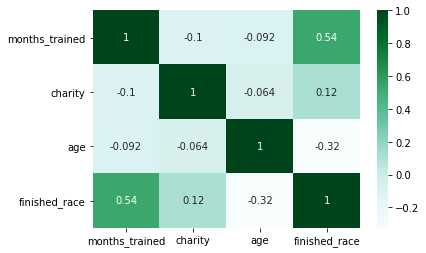

In [9]:
sns.heatmap(data.corr(),annot = True,cmap = 'BuGn')

# Analysis for data

In [10]:
# Analysis of the data 
data.describe()

,months_trained,charity,age,finished_race
count,200.000000,200.000000,200.000000,200.000000
mean,4.295000,0.025000,32.480000,0.640000
std,3.022192,0.156517,7.710829,0.481205
min,0.000000,0.000000,18.000000,0.000000
25%,2.000000,0.000000,27.000000,0.000000
50%,3.500000,0.000000,33.000000,1.000000
75%,7.000000,0.000000,39.000000,1.000000
max,10.000000,1.000000,46.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015B5CEFBD08>,
      dtype=object)

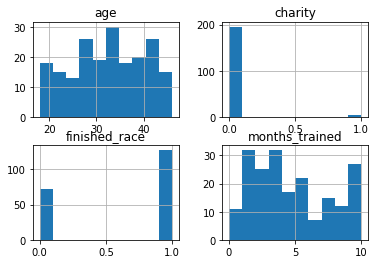

In [11]:
data.hist()

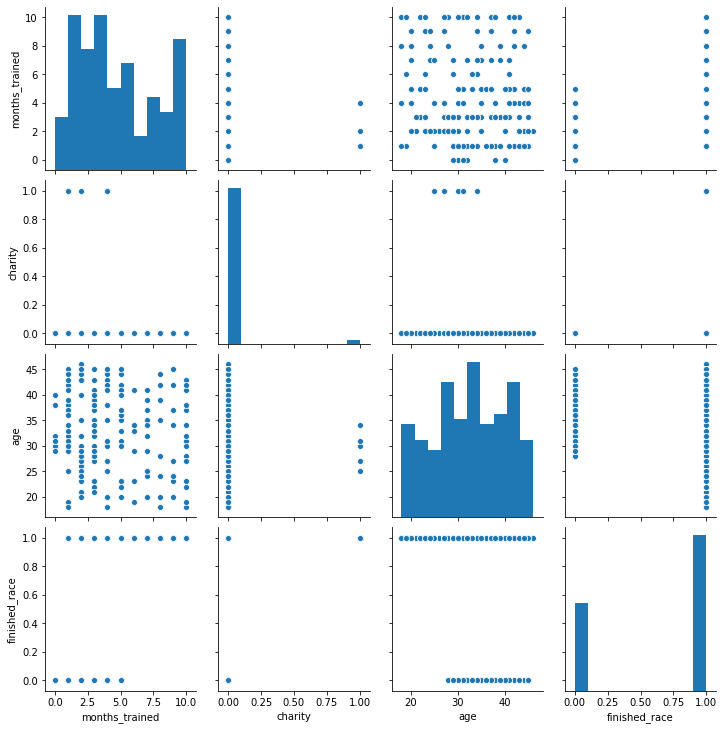

In [12]:
sns.pairplot(data)

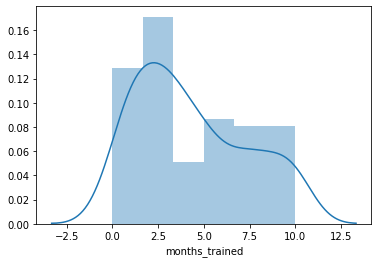

In [13]:
sns.distplot(data['months_trained'])

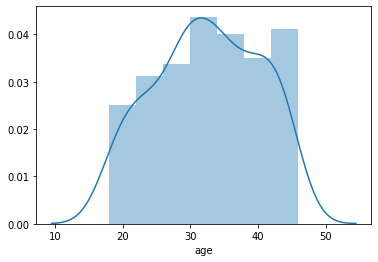

In [14]:
sns.distplot(data['age'])

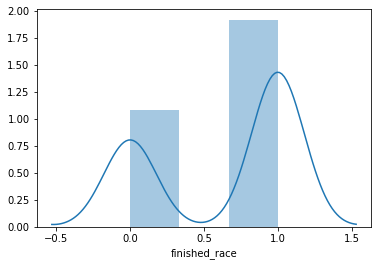

In [15]:
sns.distplot(data['finished_race'])

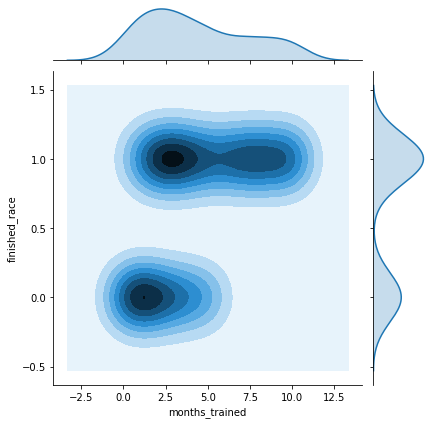

In [16]:
sns.jointplot(data['months_trained'],data['finished_race'],kind = 'kde')

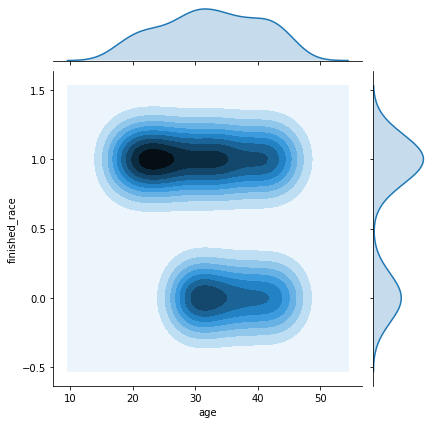

In [17]:
sns.jointplot(data['age'],data['finished_race'],kind = 'kde')

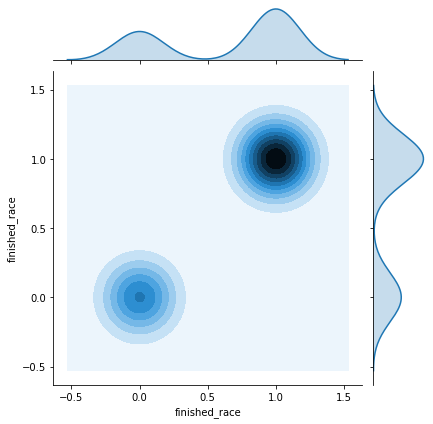

In [18]:
sns.jointplot(data['finished_race'],data['finished_race'],kind = 'kde')

In [31]:
x = data.iloc[:,0:3].values
y = data.iloc[:,3:4].values
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

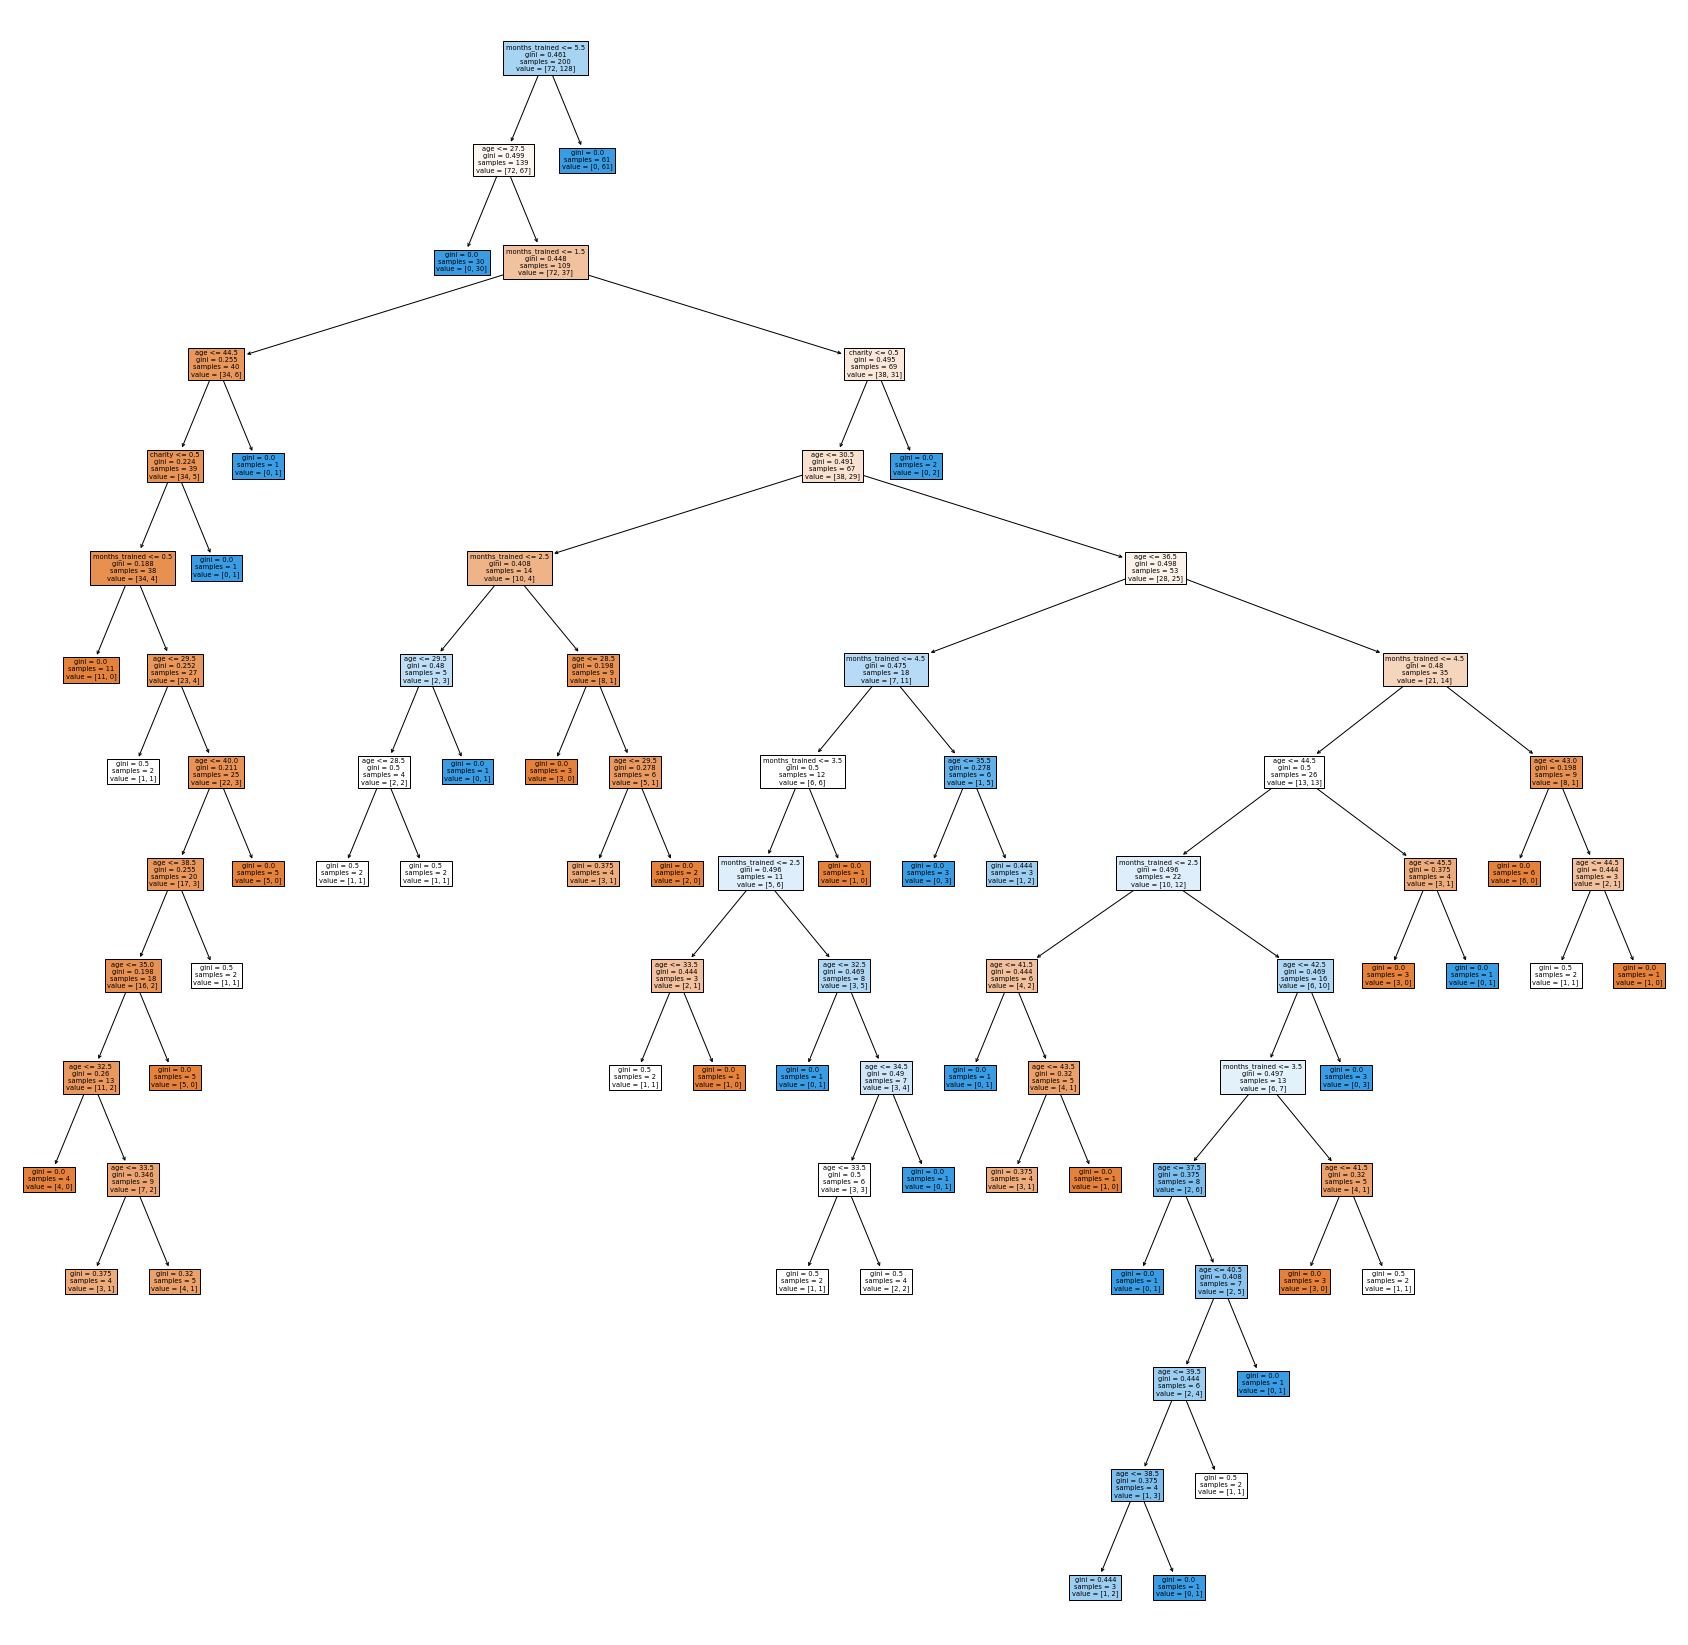

In [33]:
col = list(data.columns)
from sklearn import tree
plt.figure(figsize = (30,30))
tree.plot_tree(clf,filled = True,feature_names = col)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test,y_train,y_test = train_test_split(x,y,test_size = 0.35,random_state = 42)
print("Shape of feature training data ",x_train.shape)
print("Shape of target training data : ",y_train.shape)
print("Shape of feature testing data ",x_test.shape)
print("Shape of target testing data : ",y_test.shape)

Shape of feature training data  (130, 3)
Shape of target training data :  (130, 1)
Shape of feature testing data  (70, 3)
Shape of target testing data :  (70, 1)


In [20]:
from sklearn.tree import DecisionTreeClassifier
aa = DecisionTreeClassifier()
aa.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Classification tree 


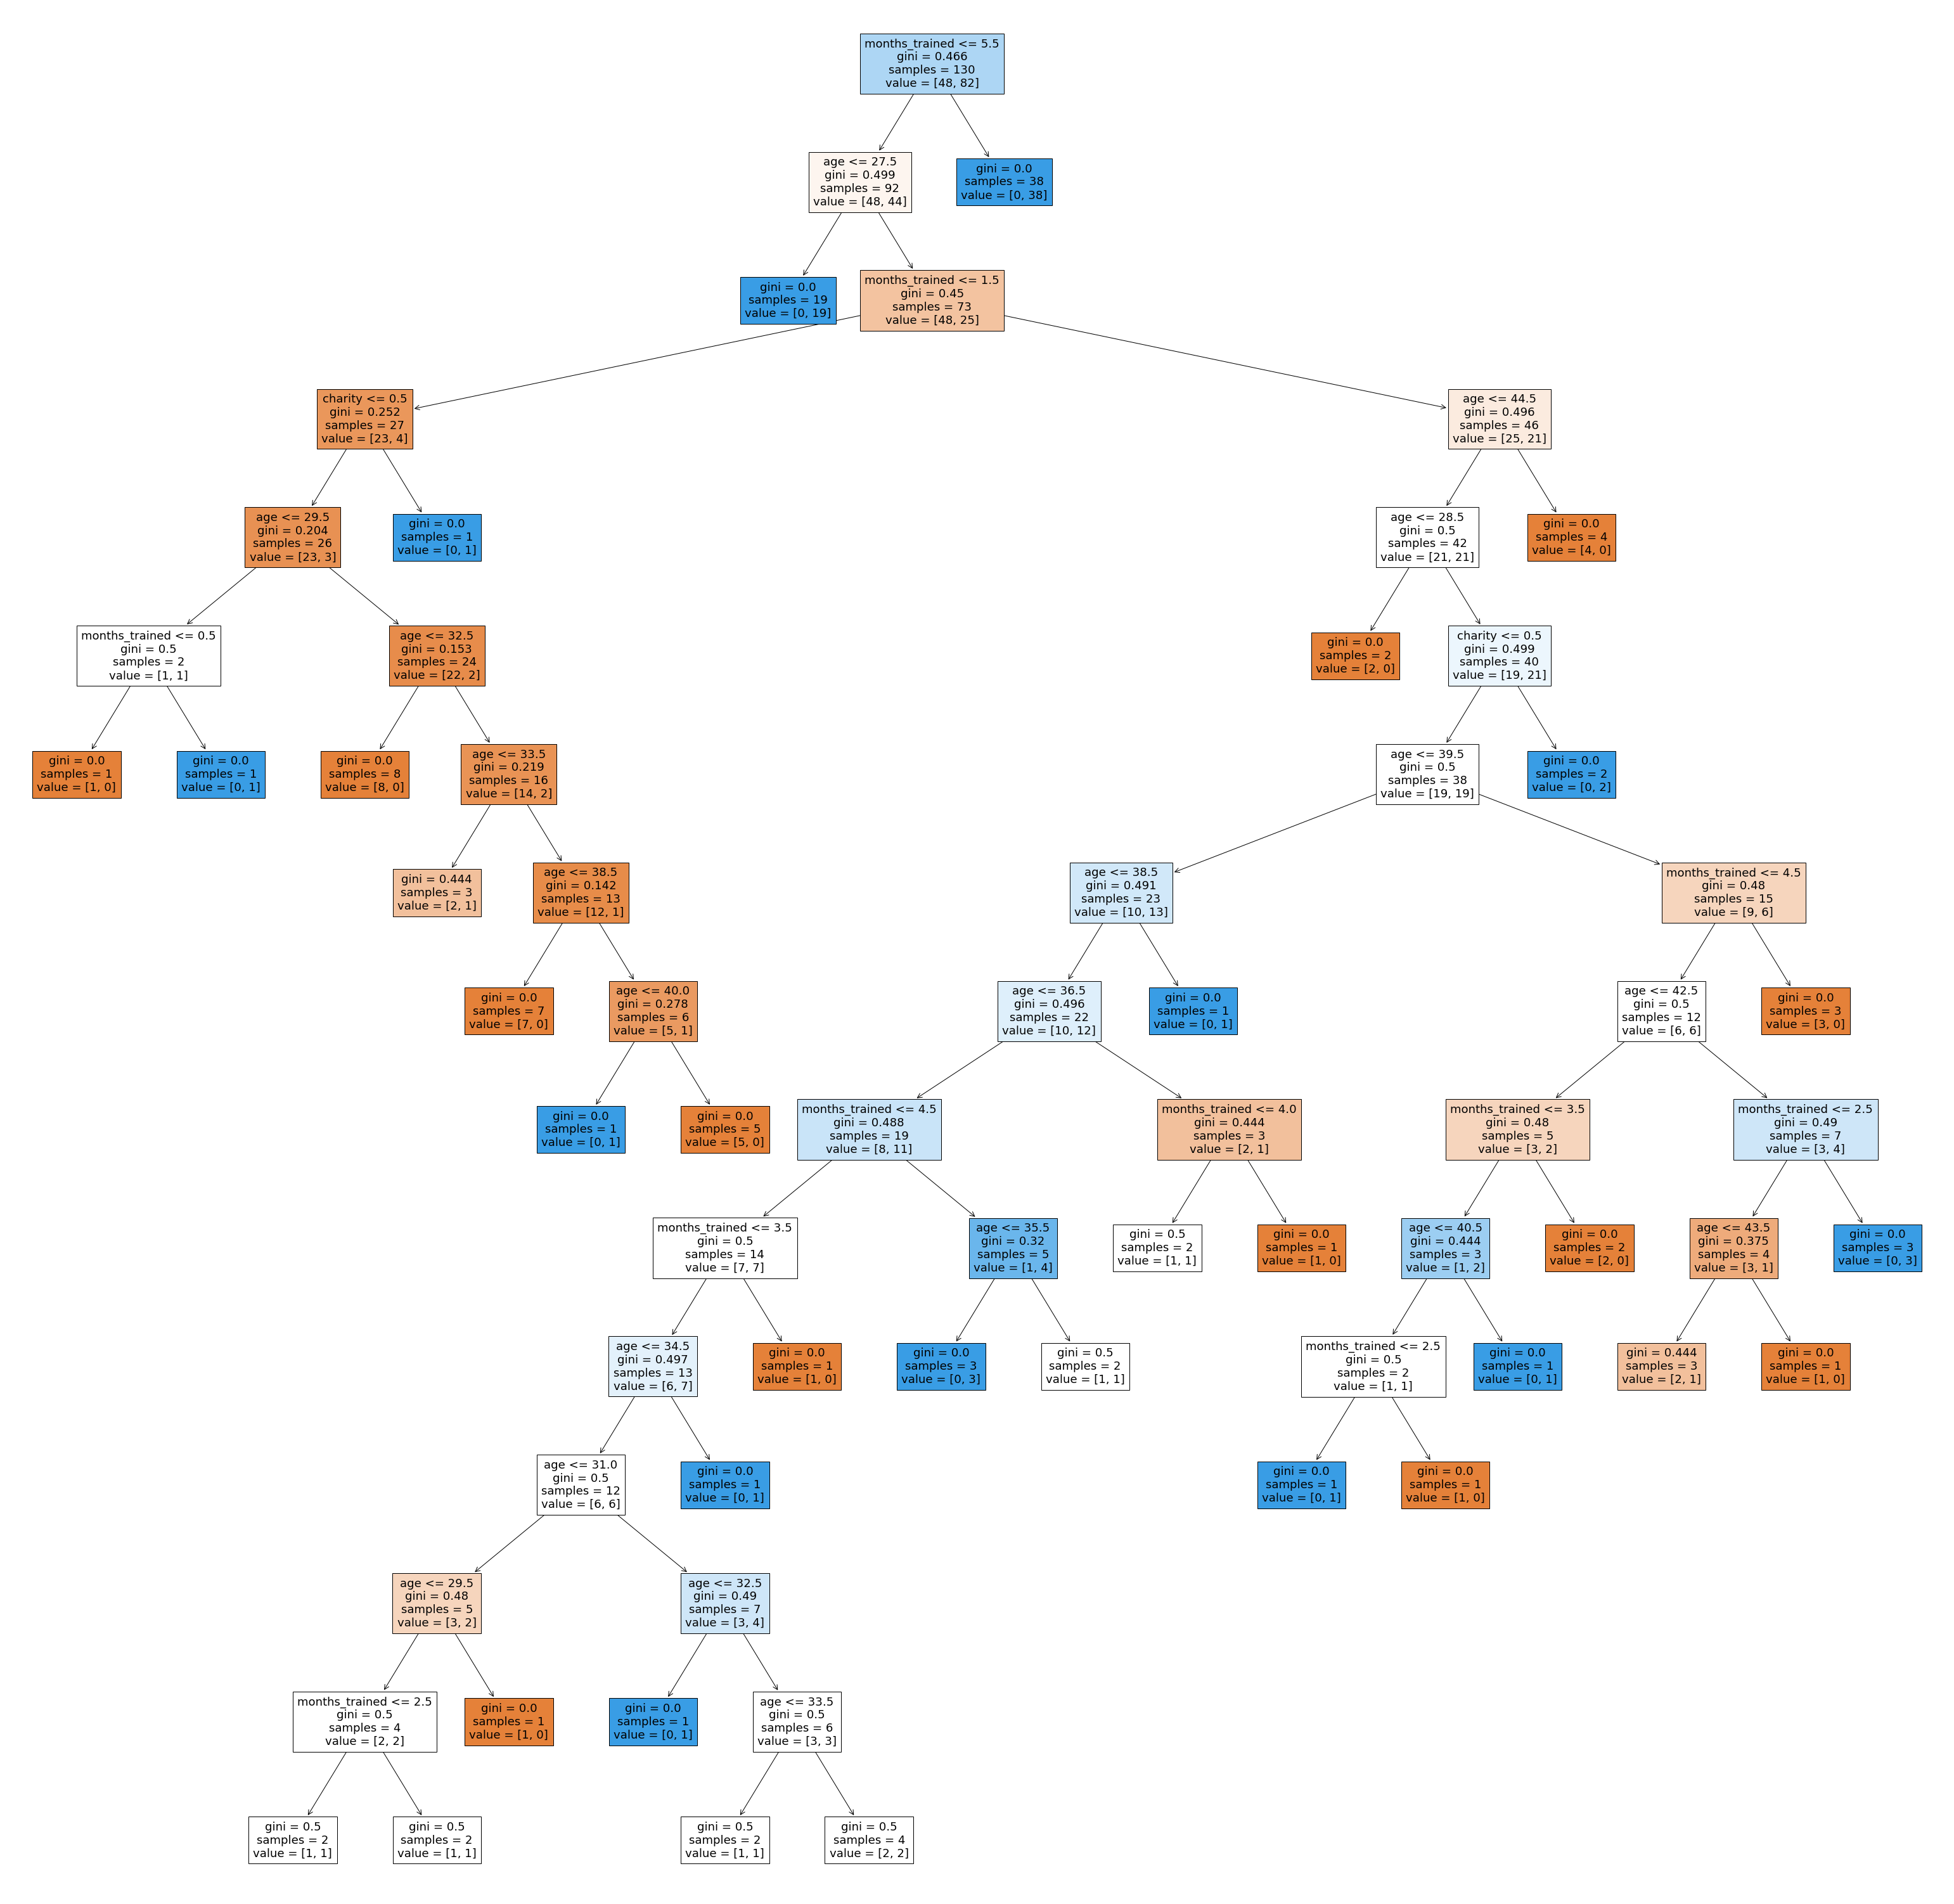

In [23]:
col = list(data.columns)
from sklearn import tree
plt.figure(figsize = (55,55))
tree.plot_tree(aa,filled = True,feature_names = col)
plt.show()

# ACCURACY AND CLASSIFICATION REPORT FOR TRAINING AND TESTING DATA

accuracy for training data : 93.07692307692308 %
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.84      0.91        57
           1       0.89      1.00      0.94        73

    accuracy                           0.93       130
   macro avg       0.95      0.92      0.93       130
weighted avg       0.94      0.93      0.93       130



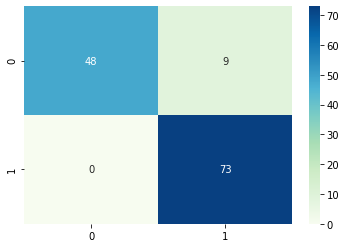

In [24]:
# For Training data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
predict = aa.predict(x_train)
print("accuracy for training data :",accuracy_score(predict,y_train)*100,"%")
print("Classification Report :\n",classification_report(predict,y_train))
sns.heatmap(confusion_matrix(predict,y_train),annot = True,cmap= 'GnBu')
plt.show()

accuracy for testing data : 75.71428571428571 %
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.62      0.68        29
           1       0.76      0.85      0.80        41

    accuracy                           0.76        70
   macro avg       0.76      0.74      0.74        70
weighted avg       0.76      0.76      0.75        70



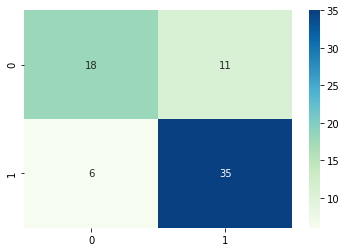

In [25]:
# For Testing data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 
predict = aa.predict(x_test)
print("accuracy for testing data :",accuracy_score(predict,y_test)*100,"%")
print("Classification Report :\n",classification_report(predict,y_test))
sns.heatmap(confusion_matrix(predict,y_test),annot = True,cmap= 'GnBu')
plt.show()